# Activity 1

Accuracy: 1.0


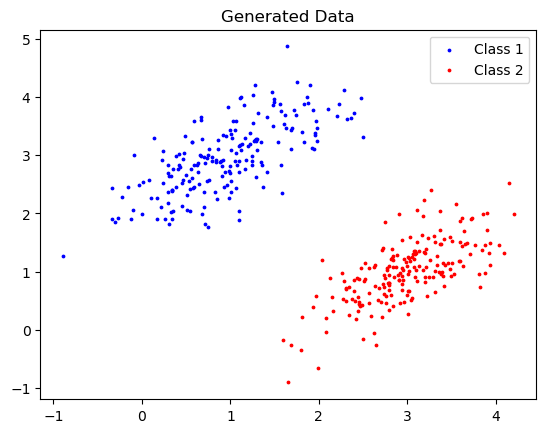

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Means and covariance matrices for two classes (Assumed from Bishop Fig. 4.6)
mean1 = np.array([1, 3])
cov1 = np.array([[0.35, 0.25], [0.25, 0.35]])

mean2 = np.array([3, 1])
cov2 = np.array([[0.35, 0.25], [0.25, 0.35]])

# Number of data points for each class
num = 200

# Generate data points for each class
class1 = np.random.multivariate_normal(mean1, cov1, num)
class2 = np.random.multivariate_normal(mean2, cov2, num)

# Calculate class-wise means
m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)

# Calculate within-class scatter matrices
s1 = np.dot((class1 - m1).T, (class1 - m1))
s2 = np.dot((class1 - m2).T, (class2 - m2))

# Within-class scatter matrix
Sw = s1 + s2

# Calculate between-class scatter matrix
Sb = np.dot((m1 - m2).reshape(-1, 1), (m1 - m2).reshape(1, -1))

# Solve the eigenvalue problem: inv(Sw) * Sb * w = lambda * w
eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))

# Sort eigenvalues and corresponding eigenvectors in decreasing order
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Choose the eigenvector corresponding to the largest eigenvalue as the projection vector
w = eigen_vectors[:, 0]

# Project data onto the 1D subspace defined by w
proj_class1 = np.dot(class1, w)
proj_class2 = np.dot(class2, w)

# Find threshold value (midpoint between means of projected data)
threshold = (np.mean(proj_class1) + np.mean(proj_class2)) / 2

# Predict labels for the test set based on the threshold
def predict_labels(data):
    return np.where(np.dot(data, w) >= threshold, 1, 0)

# Test prediction accuracy
test_data = np.vstack((class1[num // 4:], class2[num // 4:]))
test_labels = np.hstack((np.zeros(num * 3 // 4), np.ones(num * 3 // 4)))
predictions = predict_labels(test_data)
accuracy = np.mean(predictions == test_labels)
print("Accuracy:", accuracy)

# Plot the data
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1', s=3)
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2', s=3)
plt.legend()
plt.title('Generated Data')
plt.show()



### 1. Decision boundary and projection

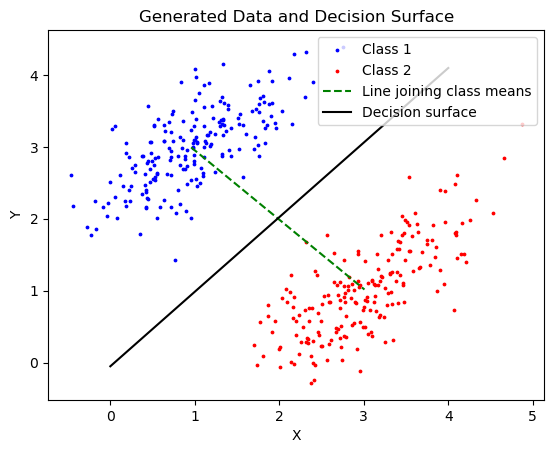

In [3]:
# Compute the line joining the class means
line_slope = (m2[1] - m1[1]) / (m2[0] - m1[0])
line_intercept = m1[1] - line_slope * m1[0]

# Plot the data
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1', s=3)
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2', s=3)

# Plot the line joining class means
plt.plot([m1[0], m2[0]], [m1[1], m2[1]], color='green', linestyle='--', label='Line joining class means')

# Plot the decision surface
midpoint = [(m1[0] + m2[0]) / 2, (m1[1] + m2[1]) / 2]
perpendicular_slope = -1 / line_slope
decision_surface_intercept = midpoint[1] - perpendicular_slope * midpoint[0]
x_decision_surface = np.linspace(0, 4, 100)
y_decision_surface = perpendicular_slope * x_decision_surface + decision_surface_intercept
plt.plot(x_decision_surface, y_decision_surface, color='black', linestyle='-', label='Decision surface')

plt.legend()
plt.title('Generated Data and Decision Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

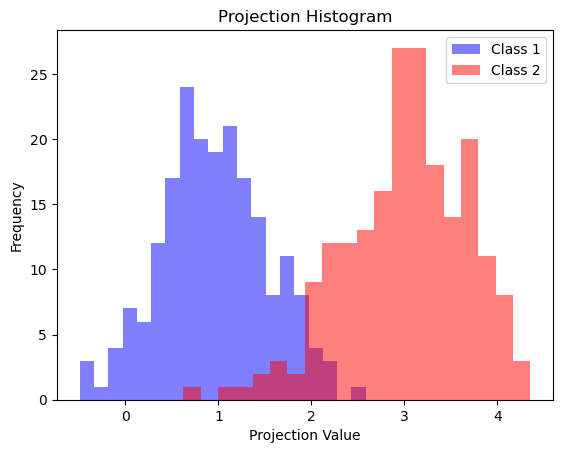

In [4]:
# Compute projections of data points onto the line joining class means
proj_class1f = [(point[1] - line_intercept) / line_slope for point in class1]
proj_class2f = [(point[1] - line_intercept) / line_slope for point in class2]

# Plot histograms for the projections
plt.hist(proj_class1f, bins=20, color='blue', alpha=0.5, label='Class 1')
plt.hist(proj_class2f, bins=20, color='red', alpha=0.5, label='Class 2')
plt.legend()
plt.title('Projection Histogram')
plt.xlabel('Projection Value')
plt.ylabel('Frequency')
plt.show()

### 2. Projection using Fisher's LDA

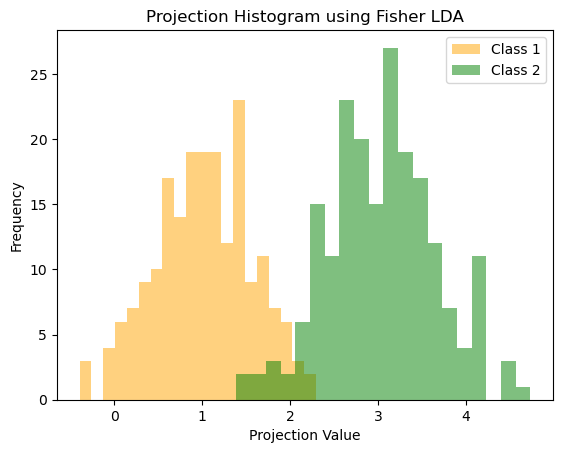

In [25]:
# Plot histograms for the projections (Fisher's LDA)
plt.hist(proj_class1, bins=20, color="orange", alpha=0.5, label='Class 1')
plt.hist(proj_class2, bins=20, color="green", alpha=0.5, label='Class 2')
plt.legend()
plt.title('Projection Histogram using Fisher LDA')
plt.xlabel('Projection Value')
plt.ylabel('Frequency')
plt.show()

# Activity 2

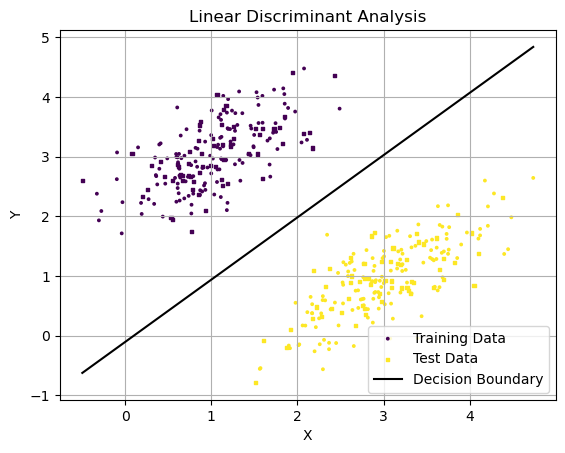

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Combine data and labels
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(num), np.ones(num)))

# Split data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Linear Discriminant Analysis on training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=3,label='Training Data')

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='s', s=5,label='Test Data')

# Plot decision boundary
coef = lda.coef_[0]
intercept = lda.intercept_
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, linestyle='-', color='black',label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Discriminant Analysis (sklearn)')
plt.legend()
plt.grid(True)
plt.show()